# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [4]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [6]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#描述性統計(含平均數及標準差)
app_train['AMT_INCOME_TOTAL'].describe()

#-->看起來可能有離群值

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [13]:
#單獨算平均數根標準差
print(app_train['AMT_INCOME_TOTAL'].mean())
print(app_train['AMT_INCOME_TOTAL'].std())


168797.9192969845
237123.14627883647


In [33]:
#最小值跟最大值差10^4倍-->直接畫直方圖會看不出所以然-->過濾數值
app_train['AMT_INCOME_TOTAL'].quantile(0.99)  #第99分位數數值
app_train['AMT_INCOME_TOTAL']> app_train['AMT_INCOME_TOTAL'].quantile(0.99)  #該欄位各值是否大於第99分位數數值 (布林)

# "整個" data frame，但只取 AMT_INCOME_TOTAL欄位有大於第99分位數的那些
app_train.loc[  app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].quantile(0.99)   ]  

#從上面那個資料框再取出['AMT_INCOME_TOTAL']這個欄位
app_train.loc[  app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].quantile(0.99)   ]   ['AMT_INCOME_TOTAL'] 


51         540000.0
59         540000.0
319        765000.0
332        630000.0
391        607500.0
622        540000.0
632        540000.0
701        540000.0
930        540000.0
1049       522000.0
1064       720000.0
1238       810000.0
1316       630000.0
1450       675000.0
1504      1080000.0
1568       630000.0
1586       720000.0
1644       697500.0
1723      1935000.0
1793       540000.0
1942       540000.0
1959       675000.0
2009       765000.0
2378       693000.0
2843       540000.0
2852       540000.0
2976       585000.0
3069       675000.0
3111       675000.0
3209       810000.0
            ...    
304302     630000.0
304305     675000.0
304378     675000.0
304441     630000.0
304477    2025000.0
304671     675000.0
304919     540000.0
304993     855000.0
305068     540000.0
305258     540000.0
305369     675000.0
305409     495000.0
305458     545733.0
305577    1215000.0
305705     675000.0
305746     540000.0
305941     675000.0
306005     675000.0
306028    1350000.0


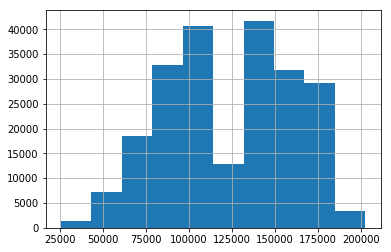

In [46]:
#直方圖 (continuous data) 只取小於75百分位數的值 
new=app_train.loc[  app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.75)   ] 
new['AMT_INCOME_TOTAL'].hist(bins=10)   #bins=組距 比如10-15 組距=5